Dataset from: https://www.kaggle.com/imakash3011/customer-personality-analysis

# Context
##Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

#Content
##Attributes

###People

*   **ID**: Customer's unique identifier
*   **Year_Birth**: Customer's birth year
*   **Education**: Customer's education level
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **Kidhome**: Number of children in customer's household
*   **Teenhome**: Number of teenagers in customer's household
*   **Dt_Customer**: Date of customer's enrollment with the company
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if customer complained in the last 2 years, 0 otherwise

###Products

*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years
*   **MntGoldProds**: Amount spent on gold in last 2 years

###Promotion

*   **NumDealsPurchases**: Number of purchases made with a discount
*   **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
*   **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
*   **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
*   **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
*   **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
*   **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

###Place

*   **NumWebPurchases**: Number of purchases made through the company’s web site
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s web site in the last month

In [ ]:
# Load of libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Way to define the format that the float numbers are displayed on screen:
pd.options.display.float_format = '{:,.1f}'.format
# Way to display all the cvolumns when we visualize the dataframe
pd.options.display.max_columns = None

In [ ]:
# Functions:

# Function to graph till 18 boxplots to visualized outliers
def boxplot_18(variables,showfliers=True):
  fig, ((ax1,ax2,ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16,ax17,ax18)) = plt.subplots(3, 6, figsize=(18,18))
  lista= variables
  lista2 = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18]
  for i,j in zip(lista, lista2):
    j.boxplot(mk[i],vert=True, showfliers=showfliers)
    j.set_title(i)
  plt.show()

# **Cleaning of the data**

In [ ]:
# We mount the drive in our google colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# We move to the folder were the data is stored
%cd '/content/drive/My Drive/DS Marketing projects/db'

/content/drive/My Drive/DS Marketing projects/db


The dataset is not suitable to be analyzed because all the information is concentrated in one column, so we will need to fix it

In [ ]:
# Load of the data
mk = pd.read_csv('marketing_campaign.csv')

In [ ]:
# Check up of duplicated rows
mk.duplicated().sum()

0

In [ ]:
# we assign a name to the only column in the data set: "ol"
# we replace the "2n Cycle" string by "2n_Cycle", we do this to be able to separate the column based on the spaces among words.
mk['ol'] = mk['ol'].apply(lambda x: x.replace('2n Cycle','2n_Cycle'))

In [ ]:
# we apply ".str.split()" to separate the information based on spaces
# we use "expand=True" to get the output into a dataframe.
mk = mk["ol"].str.split(expand=True)

In [ ]:
# Way to name the columns based on the first row of the dataset:
mk.columns = mk.iloc[0]
# We delete the first row because now is the name of the columns
mk.drop([0], axis=0, inplace = True)

At this point we have an issue with some rows because in some cases the the rows were lacking of Income´s information and that meant that the information shifted from one column to the next one because of this gap. We need to fix it.

In [ ]:
# We spotted the wrong rows with the following criterial: mk.Income <='100'
# Once the rows were spotted, a logic were generated to fix them. The logic used is the following:

mk.loc[mk.Income <='100',mk.columns[-1]] = mk[mk.columns[-2]]

In [ ]:
# Way to get to know what are the boundaries (column´s names) in our dataset to be able to code a generic form to fix the issue:
print(mk.columns[-25], mk.columns[-1])

Income Response


In [ ]:
# Based on the logic generated above, it is generated a while cicle to fix the issue:
n = -2
m = -1
while m != -25:
  mk.loc[mk.Income <='100',mk.columns[m]] = mk[mk.columns[n]]
  n = n-1
  m = m-1

The dataframe was rechecked in order to assure that everything worked properly, although two ID´s were not corrected for some unexpected reason, these rows are identified as 7244 y 8996 in their ID column

In [ ]:
# The rows are visualized:
mk.loc[(mk.ID == '8996') | (mk.ID == '7244')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
49,7244,1951,Graduation,Single,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0,None
91,8996,1957,PhD,Married,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0,None


In [ ]:
# An specific cicle is genereted to correct those specific rows:
n = -2
m = -1
while m != -25:
  mk.loc[mk.ID == '8996',mk.columns[m]] = mk[mk.columns[n]]
  mk.loc[mk.ID == '7244',mk.columns[m]] = mk[mk.columns[n]]
  n = n-1
  m = m-1

In [ ]:
# We visualize that the rows are correct:
mk.loc[(mk.ID == '8996') | (mk.ID == '7244')]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
49,7244,1951,Graduation,Single,2,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
91,8996,1957,PhD,Married,2,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0


In [ ]:
# Checking data type of each column:
mk.dtypes

0
ID                     object
Year_Birth             object
Education              object
Marital_Status         object
Income                 object
Kidhome                object
Teenhome               object
Dt_Customer            object
Recency                object
MntWines               object
MntFruits              object
MntMeatProducts        object
MntFishProducts        object
MntSweetProducts       object
MntGoldProds           object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Response               object
dtype: object

In [ ]:
# There are variables that we do not possess information, so we drop them
mk.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
# Adjustment od datatypes to work better with each column:
mk= mk.astype({'ID':'string', 'Year_Birth':'datetime64','Education':'category','Marital_Status':'category','Income':'int32',
               'Kidhome':'int32','Teenhome':'int32','Dt_Customer':'datetime64','Recency':'int32','Complain':'string',
               'MntWines':'float64','MntFruits':'float64','MntMeatProducts':'float64',
               'MntFishProducts':'float64','MntSweetProducts':'float64','MntGoldProds':'float64',
               'NumDealsPurchases':'int32','AcceptedCmp1':'int32','AcceptedCmp2':'int32','AcceptedCmp3':'int32',
               'AcceptedCmp4':'int32','AcceptedCmp5':'int32','Response':'int32',
               'NumWebPurchases':'int32','NumCatalogPurchases':'int32','NumStorePurchases':'int32','NumWebVisitsMonth':'int32'})

In [ ]:
# Way to convert the lack of data in some rows in the Income column into null values to handle them in another way:
mk.loc[mk.Income < 10, "Income"]= np.nan

In [ ]:
# Double check that the changes were applied:
mk[mk['Income']<=100]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [ ]:
# Checking of null values in each column
mk.isnull().any()

# Income column presents null values

0
ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
# Getting to know how many null values are presented in the dataset
mk.isnull().sum().sum()

# There are 24 null values

24

In [ ]:
# the dataset is sorted based on income, and as we already know the number of null values, then we choose the last 24 elements.
j= mk.sort_values('Income').tail(24)
# The data is sorted based on the Education of each individual
j.sort_values('Education')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2229,8720,1978-01-01,2n_Cycle,Together,NaN,0,0,2012-12-08,53,32.0,2.0,"1,607.0",12.0,4.0,22.0,0,0,0,1,0,0,1,0,0,0,0,0
1384,4345,1964-01-01,2n_Cycle,Single,NaN,1,1,2014-12-01,49,5.0,1.0,9.0,2.0,0.0,4.0,1,1,0,2,7,0,0,0,0,0,0,0
72,10629,1973-01-01,2n_Cycle,Married,NaN,1,0,2012-09-14,25,25.0,3.0,43.0,17.0,4.0,17.0,3,3,0,3,8,0,0,0,0,0,0,0
2082,3117,1955-01-01,Graduation,Single,NaN,0,1,2013-10-18,95,264.0,0.0,21.0,12.0,6.0,147.0,3,6,1,5,7,0,0,0,0,0,0,0
2079,5079,1971-01-01,Graduation,Married,NaN,1,1,2013-03-03,82,71.0,1.0,16.0,0.0,0.0,9.0,4,2,1,3,8,0,0,0,0,0,0,0
1383,2902,1958-01-01,Graduation,Together,NaN,1,1,2012-03-09,87,19.0,4.0,12.0,2.0,2.0,6.0,1,1,0,3,5,0,0,0,0,0,0,0
320,2863,1970-01-01,Graduation,Single,NaN,1,2,2013-08-23,67,738.0,20.0,172.0,52.0,50.0,20.0,6,2,3,10,7,0,1,0,1,0,0,0
134,1295,1963-01-01,Graduation,Married,NaN,0,1,2013-11-08,96,231.0,65.0,196.0,38.0,71.0,124.0,1,6,5,7,4,0,0,0,0,0,0,0
11,1994,1983-01-01,Graduation,Married,NaN,1,0,2013-11-15,11,5.0,5.0,6.0,0.0,2.0,1.0,1,1,0,2,7,0,0,0,0,0,0,0
92,9235,1957-01-01,Graduation,Single,NaN,1,1,2014-05-27,45,7.0,0.0,8.0,2.0,0.0,1.0,1,1,0,2,7,0,0,0,0,0,0,0


In [ ]:
# the median was calculated by each type of education level in order to fill up the lack of data.
mk.groupby('Education')['Income'].median()

Education
2n_Cycle     46,805.0
Basic        20,744.0
Graduation   52,028.5
Master       50,943.0
PhD          55,212.0
Name: Income, dtype: float64

In [ ]:
# The null values in the Income´s column are filled up with the median values calculated above
mk.loc[(mk.Education == '2n_Cycle') & (mk.Income.isnull()), 'Income'] = 46891
mk.loc[(mk.Education == 'Graduation') & (mk.Income.isnull()), 'Income'] = 52531
mk.loc[(mk.Education == 'Master') & (mk.Income.isnull()), 'Income'] = 51044
mk.loc[(mk.Education == 'PhD') & (mk.Income.isnull()), 'Income'] = 55336

In [ ]:
# Verification of null values in the dataset
mk.isnull().sum().sum()

# Zero null value. Everything worked as expected!

0

The values of the column "Marital_Status" are showing values that do not provide a lot of information, so those values should be grouped in simpler values such as: 'Alone' & 'Engaged'

In [ ]:
# Way to reduced the categories from 6 to only 2
values= ['Single','Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
for value in values:
  mk['Marital_Status']=mk['Marital_Status'].apply(lambda x: x.replace(value,'Alone'))

values_1= ['Together', 'Married']
for value in values_1:
  mk['Marital_Status']=mk['Marital_Status'].apply(lambda x: x.replace(value,'Engaged'))

In [ ]:
mk= mk.astype({'Marital_Status':'category'})

# **Enriching & reducing the dataset**

In [ ]:
# Generating a column that reveals the age of our customers. Year 2017 is taken as benchmark
mk['Age']= 2017-mk['Year_Birth'].dt.year 

In [ ]:
# Based on the variable 'Dt_Customer' it is generated a column with the number of days that each customer has been our customer:
to_date= pd.to_datetime('2017-12-12')
mk['lifetime_so_far_days']= (to_date - mk['Dt_Customer']).dt.days

In [ ]:
# We explore how has been the behavior of the customers related to the marketing campaings. So, we sum the all the accepted campaings
mk['promotion_counting']= mk['AcceptedCmp1']+mk['AcceptedCmp2']+mk['AcceptedCmp3']+mk['AcceptedCmp4']+mk['AcceptedCmp5']+mk['Response']

As we do not have a complte context about how the marketing campaings were run, the following assuption will be considered:

* The custumer can accept the promotion only once, so that means that values in the column "promotion_counting" should have only two values either 0 or 1, otherwise the value should be fixed

To fix that issue and at the same time to reduced columns a new column is generated: "Promotion_#_campaign_accepted"

In [ ]:
# Checking how many columns have values greater that 1 in the promoting column.
mk[mk['promotion_counting']>1][['promotion_counting']].count()

# 239 rows must be fixed

0
promotion_counting    239
dtype: int64

In [ ]:
# A new column is generated, this column will indicate in which number of campaing the customer accept the promotion.
# This column will allow us to reduced the number of columns
mk["Promotion_#_campaign_accepted"]= 0

In [ ]:
# The assignation of values to the new column starts with those rows that the 'promotion_counting=1'.
# The number in which the promotion is accepted by the customer is assigned 
mk.loc[(mk['promotion_counting']==1) & (mk['AcceptedCmp1']==1), 'Promotion_#_campaign_accepted' ] = 1
mk.loc[(mk['promotion_counting']==1) & (mk['AcceptedCmp2']==1), 'Promotion_#_campaign_accepted' ] = 2
mk.loc[(mk['promotion_counting']==1) & (mk['AcceptedCmp3']==1), 'Promotion_#_campaign_accepted' ] = 3
mk.loc[(mk['promotion_counting']==1) & (mk['AcceptedCmp4']==1), 'Promotion_#_campaign_accepted' ] = 4
mk.loc[(mk['promotion_counting']==1) & (mk['AcceptedCmp5']==1), 'Promotion_#_campaign_accepted' ] = 5
# Number 6 means that the promotion was accepted in the last campaign done.  
mk.loc[(mk['promotion_counting']==1) & (mk['Response']==1), 'Promotion_#_campaign_accepted' ] = 6

In [ ]:
# Ajuste de número de campaña asignada para aquellos usuarios que tienen marcada más de una campaña en su fila:
# Those rows that have the column of 'promotion_counting > 1' are assigned based on three criteria.
# The order of the code is important to get the values correctly.
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['AcceptedCmp1']==1), 'Promotion_#_campaign_accepted' ] = 1
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['AcceptedCmp2']==1), 'Promotion_#_campaign_accepted' ] = 2
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['AcceptedCmp3']==1), 'Promotion_#_campaign_accepted' ] = 3
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['AcceptedCmp4']==1), 'Promotion_#_campaign_accepted' ] = 4
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['AcceptedCmp5']==1), 'Promotion_#_campaign_accepted' ] = 5
mk.loc[(mk['promotion_counting']>1) & (mk['Promotion_#_campaign_accepted']==0) & (mk['Response']==1), 'Promotion_#_campaign_accepted' ] = 6

In [ ]:
# assigning a type of data to the new variable:
mk['Promotion_#_campaign_accepted'] = mk['Promotion_#_campaign_accepted'].astype('category')

Some columns can be summarized in one column, so we do that:



In [ ]:
# One column is gotten based on 'Kidhome' and 'Teenhome' columns
mk["#_children_at_home"]= mk['Kidhome'] + mk['Teenhome']

In [ ]:
# It is summarized the expenditure of each customer for the last two year in a single column
mk["Total_$_spend_last_2_years"]= mk['MntFishProducts']+mk['MntFruits']+mk['MntGoldProds']+mk['MntMeatProducts']+mk['MntSweetProducts']+mk['MntWines']

In [ ]:
# It is summarized the purchases of each customer for the last two year in a single column
mk['Total_#_purchases']= mk['NumCatalogPurchases']+mk['NumStorePurchases']+mk['NumWebPurchases']+mk['NumDealsPurchases']

The columns that do not add value anymore are dropped

In [ ]:
mk.drop(columns = ['Dt_Customer','Kidhome','Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response',
                   'promotion_counting'], axis=1, inplace=True)

# **Managing outliers**

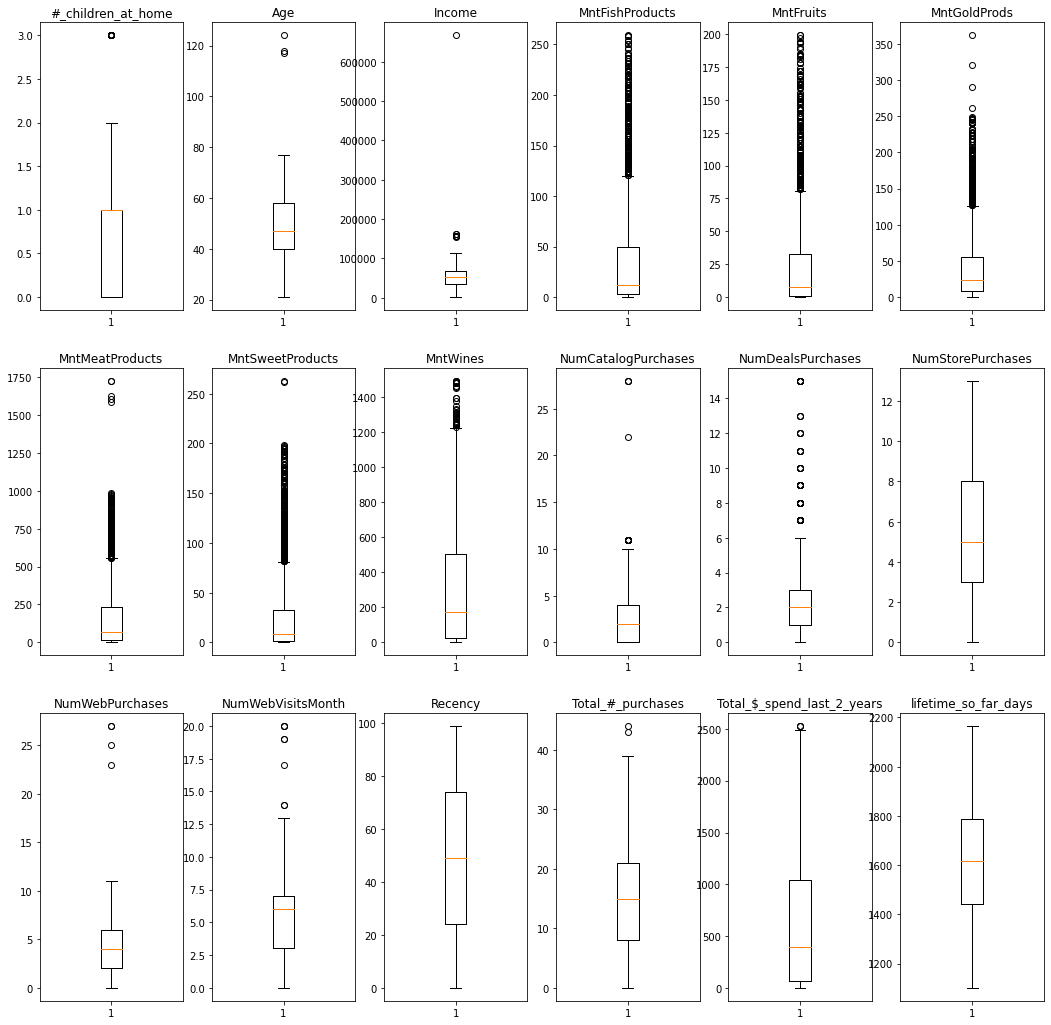

In [ ]:
# One of the easiest ways to uncover the outliers in our dataset is through data viz, in this case, boxplots: 
# The float and integer variables are graphed:
lista= ['#_children_at_home','Age','Income','MntFishProducts','MntFruits','MntGoldProds','MntMeatProducts',
        'MntSweetProducts','MntWines','NumCatalogPurchases','NumDealsPurchases','NumStorePurchases',
        'NumWebPurchases','NumWebVisitsMonth','Recency','Total_#_purchases','Total_$_spend_last_2_years',
        'lifetime_so_far_days']
boxplot_18(lista)

Based on common sense and the information that is provided in the dataset, the following actions are taken to reduced some evident outliers in the following columns:
* Income
* Age

Other outliers display on the boxplots could be possible, so we will keep those pieces of information as they are.

In [ ]:
# Any value grater than 600000 will be replaced by 66,666 in the Income column
mk.loc[mk.Income> 600000, "Income"] = 66666

In [ ]:
# there are three values in the age column that are unusual, so we correct them with more logical values because it seems that 
# the wrong information was because some typos.
mk.loc[mk.ID == "7829", "Year_Birth"] = pd.to_datetime("1990-01-01")
mk.loc[mk.ID == "11004", "Year_Birth"] = pd.to_datetime("1993-01-01")
mk.loc[mk.ID == "1150", "Year_Birth"] = pd.to_datetime("1979-01-01")

In [ ]:
# Recalculating the ages
id = ['7829','11004','1150']
for i in id:
  mk.loc[mk.ID == i,"Age"] = 2017-mk['Year_Birth'].dt.year

mk.drop(columns = ['Year_Birth'], axis=1, inplace=True)

At this point, the dataset has been cleaned to be saved and used in other software if it is necessary

In [ ]:
# Now the dataframe can be saved in any kind of format to be analyzed in any kind of software
mk.to_csv("MARKETING_DATA_FINAL.csv", index=False)

**Cleaning is done ❕**

# Final result o
##Attributes

###People

*   **ID**: Customer's unique identifier
*   **Education**: Customer's education level
*   **Age**: Customer´s age
*   **Marital_Status**: Customer's marital status
*   **Income**: Customer's yearly household income
*   **#_children_at_home**: Number of children plus teenagers in customer's household
*   **Recency**: Number of days since customer's last purchase
*   **Complain**: 1 if customer complained in the last 2 years, 0 otherwise

###Products

*   **MntWines**: Amount spent on wine in last 2 years
*   **MntFruits**: Amount spent on fruits in last 2 years
*   **MntMeatProducts**: Amount spent on meat in last 2 years
*   **MntFishProducts**: Amount spent on fish in last 2 years
*   **MntSweetProducts**: Amount spent on sweets in last 2 years
*   **MntGoldProds**: Amount spent on gold in last 2 years
*   **Total_$_spend_last_2_years**: Sum of the amount spent on all the categories in last 2 years


###Promotion

*   **NumDealsPurchases**: Number of purchases made with a discount
*   **Promotion_#_campaign_accepted:** Number of campaign that the customer accepted the promotion  
*   **Response:** 

###Place

*   **NumWebPurchases**: Number of purchases made through the company’s web site
*   **NumCatalogPurchases**: Number of purchases made using a catalogue
*   **NumStorePurchases**: Number of purchases made directly in stores
*   **NumWebVisitsMonth**: Number of visits to company’s web site in the last month
*   **Total_#_purchases**: NumWebPurchases + NumCatalogPurchases + NumStorePurchases
*   **lifetime_so_far_days:**  Number of days that have passed since the person started to be a ccustomer